<a href="https://colab.research.google.com/github/Dheerajpanwar123/Bank-loan-analysis-/blob/main/Amazon_earphones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

In [ ]:
df=pd.read_csv("/content/ProductInfo.csv")
df

,MRP,Price,ProductFullName,ProductShortName,ReviewURL,id
0,2990,1399,boAt Rockerz 255 Sports Bluetooth Wireless Ear...,boAt Rockerz 255,https://www.amazon.in/255-Bluetooth-Wireless-E...,1
1,3999,1099,Flybot Wave in-Ear Sport Wireless Bluetooth Ea...,Flybot Wave,https://www.amazon.in/Flybot-Wireless-Bluetoot...,2
2,3999,1099,Flybot Boom Deep Bass in-Ear Wireless Bluetoot...,Flybot Boom,https://www.amazon.in/Flybot-Wireless-Bluetoot...,3
3,2000,749,PTron Intunes Pro Headphone Magnetic Earphone ...,PTron Intunes,https://www.amazon.in/PTron-Intunes-Pro-Smartp...,4
4,5999,2999,Flybot Beat True Wireless Bluetooth Earphones ...,Flybot Beat,https://www.amazon.in/Flybot-Wireless-Bluetoot...,5
5,3799,3190,Samsung EO-BG950CBEGIN Bluetooth Wireless in-E...,Samsung EO-BG950CBEIN,https://www.amazon.in/Samsung-EO-BG950CBEGIN-B...,6
6,2999,1999,JBL T205BT Pure Bass Wireless Metal Earbud Hea...,JBL T205BT,https://www.amazon.in/JBL-T205BT-Wireless-Earb...,7
7,7490,6499,Sennheiser CX 6.0BT 507447 in Ear Wireless Ear...,Sennheiser CX 6.0BT,https://www.amazon.in/Sennheiser-CX-507447-Wir...,8
8,5299,3699,Skullcandy S2PGHW-174 in-Ear Wireless Headphon...,Skullcandy S2PGHW-174,https://www.amazon.in/Skullcandy-S2PGHW-174-Wi...,9
9,2259,2000,JBL T110BT Pure Bass Wireless in-Ear Headphone...,JBL T110BT,https://www.amazon.in/JBL-T110BT-Wireless-Head...,10


In [ ]:
df.isnull().sum()

,0
MRP,0
Price,0
ProductFullName,0
ProductShortName,0
ReviewURL,0
id,0
Product_Sentiment,0
Review_Sentiment,0


In [ ]:
print("Dataset Preview:")
print(df.head())

Dataset Preview:
    MRP  Price                                    ProductFullName  \
0  2990   1399  boAt Rockerz 255 Sports Bluetooth Wireless Ear...   
1  3999   1099  Flybot Wave in-Ear Sport Wireless Bluetooth Ea...   
2  3999   1099  Flybot Boom Deep Bass in-Ear Wireless Bluetoot...   
3  2000    749  PTron Intunes Pro Headphone Magnetic Earphone ...   
4  5999   2999  Flybot Beat True Wireless Bluetooth Earphones ...   

   ProductShortName                                          ReviewURL  id  
0  boAt Rockerz 255  https://www.amazon.in/255-Bluetooth-Wireless-E...   1  
1       Flybot Wave  https://www.amazon.in/Flybot-Wireless-Bluetoot...   2  
2       Flybot Boom  https://www.amazon.in/Flybot-Wireless-Bluetoot...   3  
3     PTron Intunes  https://www.amazon.in/PTron-Intunes-Pro-Smartp...   4  
4       Flybot Beat  https://www.amazon.in/Flybot-Wireless-Bluetoot...   5  


In [ ]:
# Step 3: Define a function to get sentiment using TextBlob
def get_sentiment(text):
    # Create a TextBlob object
    blob = TextBlob(str(text))
    polarity = blob.sentiment.polarity  # Get polarity score
    # Determine sentiment based on polarity score
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"


In [ ]:
# Step 3: Define a function to get sentiment using TextBlob
def get_sentiment(text):
    # Create a TextBlob object
    blob = TextBlob(str(text))
    polarity = blob.sentiment.polarity  # Get polarity score
    # Determine sentiment based on polarity score
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Step 4: Apply sentiment analysis to ProductFullName and ReviewURL columns
df['Product_Sentiment'] = df['ProductFullName'].apply(get_sentiment)
df['Review_Sentiment'] = df['ReviewURL'].apply(get_sentiment)

# Step 5: Display the results with sentiment columns
print("Sentiment Analysis Results:")
print(df[['ProductFullName', 'Product_Sentiment', 'ReviewURL', 'Review_Sentiment']])

# Step 6: Plot graphical representation (Bar Chart for sentiment distribution)
# Product sentiment distribution
product_sentiment_counts = df['Product_Sentiment'].value_counts()


Sentiment Analysis Results:
                                     ProductFullName Product_Sentiment  \
0  boAt Rockerz 255 Sports Bluetooth Wireless Ear...          Positive   
1  Flybot Wave in-Ear Sport Wireless Bluetooth Ea...          Negative   
2  Flybot Boom Deep Bass in-Ear Wireless Bluetoot...          Negative   
3  PTron Intunes Pro Headphone Magnetic Earphone ...           Neutral   
4  Flybot Beat True Wireless Bluetooth Earphones ...          Positive   
5  Samsung EO-BG950CBEGIN Bluetooth Wireless in-E...          Negative   
6  JBL T205BT Pure Bass Wireless Metal Earbud Hea...          Negative   
7  Sennheiser CX 6.0BT 507447 in Ear Wireless Ear...          Negative   
8  Skullcandy S2PGHW-174 in-Ear Wireless Headphon...           Neutral   
9  JBL T110BT Pure Bass Wireless in-Ear Headphone...          Negative   

                                           ReviewURL Review_Sentiment  
0  https://www.amazon.in/255-Bluetooth-Wireless-E...          Neutral  
1  https://ww

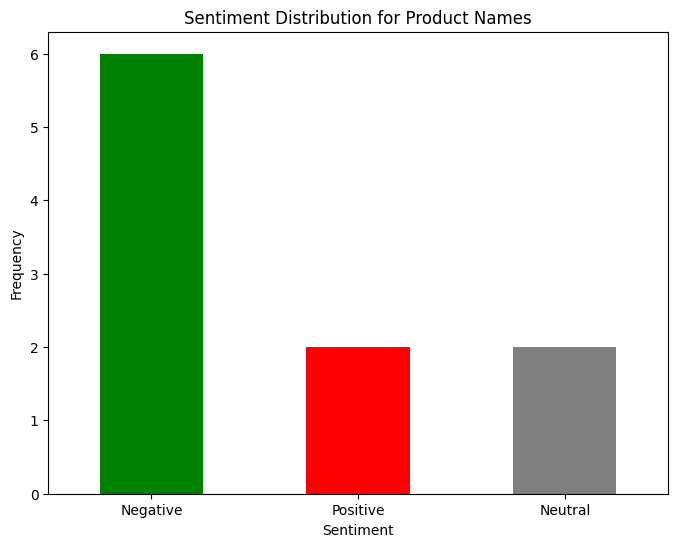

In [ ]:
plt.figure(figsize=(8, 6))
product_sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution for Product Names')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [ ]:
review_sentiment_counts = df['Review_Sentiment'].value_counts()


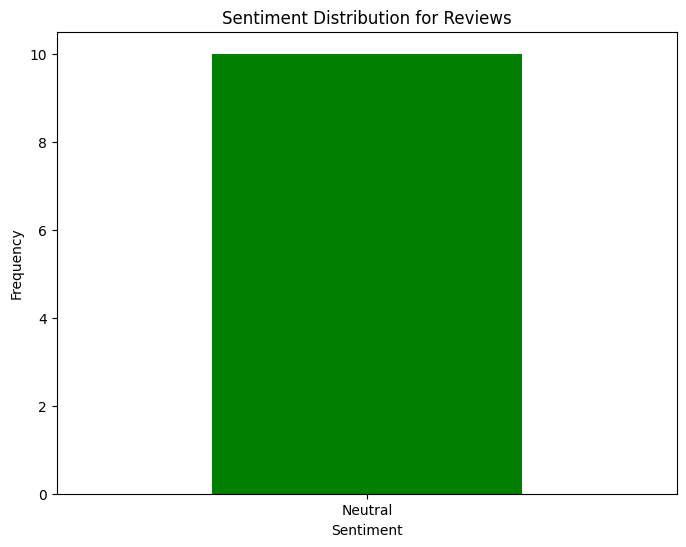

In [ ]:
plt.figure(figsize=(8, 6))
review_sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution for Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()